##  Week4 복습과제

Week3에 대한 복습과제입니다.  
데이터셋(train.csv, mushrooms.csv)을 다운 받아주세요!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 'train.csv'으로 train_df를 생성하세요.

In [2]:
train_df = pd.read_csv('train.csv')

#### 데이터 보정을 위해 다음 코드를 실행시켜 주세요.

In [3]:
# id 제외

train_df = train_df.drop("id", axis = 1)

In [4]:
train_df.head(3)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,0.467875,0.354330,0.811616,0.791225,black,Ghoul


#### LabelEncoder를 사용해 color, type column을 인코딩한 train_df를 만드시오.

In [5]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
train_df['color']=encoder.fit_transform(train_df['color'])
train_df['type'] = encoder.fit_transform(train_df['type'])

train_df.head(3)

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,3,1
1,0.575560,0.425868,0.531401,0.439899,4,2
2,0.467875,0.354330,0.811616,0.791225,0,1


#### feature간의 상관관계를 확인하는 heatmap을 출력하시오.

<AxesSubplot:>

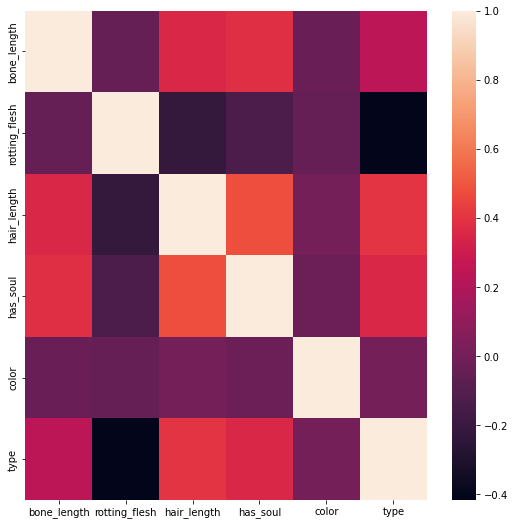

In [6]:
import seaborn as sns

plt.figure(figsize=(9,9))
corr = train_df.corr()
sns.heatmap(corr)

#### 독립변수(X)와 종속변수(y-type)로 분리해주세요(iloc 또는 loc 활용) 그리고 확인해주세요.
#### X와 y를 X_train, X_test, y_train, y_test으로 나누시오. (test_size=0.2, random_state=12) 

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(train_df.iloc[:,:5],train_df.iloc[:,5],test_size = 0.2,random_state = 12)
X_train.head(3)

,bone_length,rotting_flesh,hair_length,has_soul,color
292,0.476892,0.478592,0.403630,0.544587,2
236,0.451085,0.464508,0.505819,0.509010,0
222,0.250293,0.408878,0.456618,0.466024,5


#### Gradient Boost를 활용하여 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (random_state=0,n_estimators=50,learning_rate=0.5)


In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(random_state = 0, n_estimators = 50,learning_rate = 0.5)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

GBM 정확도: 0.7067


#### GBM 하이퍼 파라미터 튜닝을 한 후, 최적의 하이퍼 파라미터를 구하고 정확도를 출력하시오. 위의 값과 정확도를 비교하시오. 이때 n_estimators는 50,100,500, learning_rate는 0.005, 0.1, 0.5,1,10 을 변수로 넣으시오.(gridsearchCV이용,cv=2,verbose=1)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[50,100,500], 'learning_rate':[0.005,0.1,0.5,1,10]}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 파라미터 : ',grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
최적 파라미터 :  {'learning_rate': 0.005, 'n_estimators': 500}
최고 예측 정확도 : 0.7095


#### 사이킷런 래퍼 클래스 XGBoost를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. (n_estimators=400, learning_rate = 0.1, max_depth = 3)

In [12]:
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [13]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
xgb_preds = xgb_wrapper.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
print('정확도: {0:.4f}'.format(xgb_accuracy))

[23:09:39] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
정확도: 0.6800


#### 사이킷런 래퍼 클래스 LightGBM를 사용해 train 세트를 fit 한 후 test 세트로 예측의 정확도를 출력하시오. 

n_estimators=400
조기 중단 파라미터: early_stopping_rounds=100, eval_metric="logloss",  eval_set=evals 

In [14]:
import lightgbm
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier(n_estimators = 400, learning_rate=0.05)

evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric = "logloss", eval_set = evals)
preds = lgbm_wrapper.predict(X_test)
lgbm_accuracy = accuracy_score(y_test,preds)
print('정확도: {0:.4f}'.format(lgbm_accuracy))

[1]	valid_0's multi_logloss: 1.07553
[2]	valid_0's multi_logloss: 1.04342
[3]	valid_0's multi_logloss: 1.01902
[4]	valid_0's multi_logloss: 0.99933
[5]	valid_0's multi_logloss: 0.979666
[6]	valid_0's multi_logloss: 0.964895
[7]	valid_0's multi_logloss: 0.941336
[8]	valid_0's multi_logloss: 0.925882
[9]	valid_0's multi_logloss: 0.908661
[10]	valid_0's multi_logloss: 0.889802
[11]	valid_0's multi_logloss: 0.874624
[12]	valid_0's multi_logloss: 0.861151
[13]	valid_0's multi_logloss: 0.846801
[14]	valid_0's multi_logloss: 0.837943
[15]	valid_0's multi_logloss: 0.826008
[16]	valid_0's multi_logloss: 0.816897
[17]	valid_0's multi_logloss: 0.810242
[18]	valid_0's multi_logloss: 0.805214
[19]	valid_0's multi_logloss: 0.801003
[20]	valid_0's multi_logloss: 0.798126
[21]	valid_0's multi_logloss: 0.795195
[22]	valid_0's multi_logloss: 0.792362
[23]	valid_0's multi_logloss: 0.790211
[24]	valid_0's multi_logloss: 0.78838
[25]	valid_0's multi_logloss: 0.786373
[26]	valid_0's multi_logloss: 0.781711


## Stacking 실습

CV set 기반 stacking을 통해 앙상블 모델을 만드려고 합니다.    
개별 모델이 교차검증을 통해 최종 모델이 사용할 학습용, 테스트용 데이터를 만드는 함수를 생성하시오.
```
def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    return train_fold_pred , test_pred_mean
```

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

def get_stacking_dataset(model, X_train, y_train, X_test, n_folds):
    kfold = KFold(n_splits=n_folds)
    train_fold_pred = np.zeros((X_train.shape[0], 1))
    test_pred = np.zeros((X_test.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')
    
    for fold, (train_idx, valid_idx) in enumerate(kfold.split(X_train)):
        X_tr = X_train.loc[train_idx]
        y_tr = y_train.loc[train_idx]
        X_val = X_train.loc[valid_idx]
        model.fit(X_tr, y_tr)
        train_fold_pred[valid_idx, :] = model.predict(X_val).reshape(-1, 1)
        test_pred[:, fold] = model.predict(X_test)
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)
    return train_fold_pred , test_pred_mean

스태킹에 사용될 개별 모델을 생성하시오.

개별 모델:  KNN(n_neighbors=4), 랜덤 포레스트(n_estimators=100, random_state=0), 결정 트리, AdaBoost(n_estimators=100), LightGBM(n_estimators=400)

최종 모델: 로지스틱 회귀 (C=10)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
knn_clf  = KNeighborsClassifier(n_neighbors = 4)
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators = 100)
lgbm_clf = LGBMClassifier(n_estimators = 400)
lr_meta = LogisticRegression(C = 10)

위에서 생성한 함수를 사용해 개별 모델을 학습, 예측시켜 메타모델에 사용될 학습용 데이터와 테스트용 데이터를 생성하고, 스태킹하시오.  
fold 수 = 6  
학습용 데이터 : stacked_X_train  
테스트용 데이터 : stacked_X_test

In [17]:
knn_train, knn_test = get_stacking_dataset(knn_clf, X_train, y_train, X_test, n_folds= 6)
rf_train, rf_test = get_stacking_dataset(rf_clf, X_train, y_train, X_test, 6)
dt_train, dt_test = get_stacking_dataset(dt_clf, X_train, y_train, X_test,  6)    
ada_train, ada_test = get_stacking_dataset(ada_clf, X_train, y_train, X_test, 6)
lgbm_train, lgbm_test = get_stacking_datasets(lgbm_clf, X_train, y_train, X_test, 6)

KNeighborsClassifier  model 시작 


KeyError: '[50, 52, 69, 71, 78, 81, 85, 86, 87, 90, 92, 101, 106, 122, 124, 125, 127, 131, 139, 144, 150, 161, 167, 176, 180, 186, 193, 200, 201, 207, 221, 228, 229, 233, 238, 250, 252, 257, 265, 273, 276, 280, 283, 284, 290, 294] not in index'

In [18]:
stacked_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train, lgbm_train), axis = 1)
stacked_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test, lgbm_test), axis = 1)

print('원본 학습 피처데이터 Shape: ', X_train.shape, ' 원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처데이터 Shape: ', stacked_final_X_train.shape, ' 스태킹 테스트 피처 Shape:', stacked_final_X_test.shape)

NameError: name 'knn_train' is not defined

최종 모델 (logistic regression)을 학습시키고, 정확도를 구하시오.

In [19]:
lr_final.fit(stacked_final_X_train, y_train)
stack_final=lr_final.predict(stack_final_X_test)

accuracy_score(y_test, stack_final)

NameError: name 'lr_final' is not defined

### CatBoost

범주형 변수가 많은 데이터에 catboost를 적용해봅시다.

데이터 출처:
https://www.kaggle.com/datasets/uciml/mushroom-classification


In [20]:
# mushrooms.csv 파일을 사용합니다.

mushroom_df = pd.read_csv('mushrooms.csv')

mushroom_df feature들의 data type을 확인하시오.

In [21]:
mushroom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

feature와 target을 각각 X_mushroom, y_mushroom으로 분리하고,  
train_test_split 함수로 train, test set을 분리하시오. (test size = 0.2)

In [28]:
X_mushroom = mushroom_df.drop(['class'],axis=1,inplace=False)
y_mushroom = mushroom_df['class']
X_train, X_test, y_train, y_test = train_test_split(X_mushroom, y_mushroom, test_size=0.2)

CatBoostClassifier를 불러오고, Pool 함수를 이용해 범주형 변수를 처리하도록 train_pool, test_pool을 만드시오.

In [29]:
!pip install catboost

In [30]:
from catboost import Pool

In [31]:
pool_train = Pool(data = X_train, label = y_train)
pool_test = Pool(data = X_test, label = y_test)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=0]="b": Cannot convert 'b'b'' to float

iteration=400, learning_rate=0.1, max_depth=3로 설정한 CatBoost 모델로 버섯에 대한 정보를 학습하고 테스트 데이터 버섯의 독성 여부를 예측하시오. 또 정확도를 구하시오.  

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier(iterations=400, learning_rate=0.1, max_depth=3)
cb_clf.fit(pool_train)
pred = cb_clf.predict(pool_test)
accuracy = accuracy_score(y_test, pred)
print(accuracy)

수고하셨습니다!